<a href="https://colab.research.google.com/github/jayasravani123/TEXT-SUMMARIZER/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LinearRegression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv('/content/DATASET.csv')

In [21]:
data.sample(5)

,product_id,product_name,month_year,place,total_price,freight_price,unit_price_per100g,product_name_lenght,product_weight_g,product_score,...,sept,oct,nov,dec,SEASONAL Sales,Off seasonal sales,SEASONAL PRICE,Off seasonal price,Quantity of sold,sales
6,fruit7,blue berries,nov-april,andhra pradesh,2000,200.0,200.0,12,1000,4.3,...,1100,1000,2000,3000,12300,6900,2300,2700,19200,3840000
5,fruit6,cherry,aug-jan,andhra pradesh,300,24.0,30.0,12,1000,4.4,...,2300,2000,2000,3000,13300,7300,200,300,20600,618000
0,fruit1,avocado,may-sept,andhra pradesh,240,17.0,24.0,7,1000,4.5,...,1700,1400,1300,1300,8450,7550,180,250,16000,384000
2,fruit3,kiwis,oct-may,andhra pradesh,185,14.8,18.5,5,1000,4.0,...,900,1200,1200,1200,9040,3650,130,180,12690,234765
11,fruite12,pomegranate,feb-may,andhra pradesh,140,6.0,40.0,11,1000,4.1,...,2000,2000,2000,2000,20700,18400,70,150,39100,1564000



Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [22]:
data.shape

(12, 28)

Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [23]:
data.describe()

,total_price,freight_price,unit_price_per100g,product_name_lenght,product_weight_g,product_score,jan,feb,march,april,...,sept,oct,nov,dec,SEASONAL Sales,Off seasonal sales,SEASONAL PRICE,Off seasonal price,Quantity of sold,sales
count,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,324.583333,27.733333,34.208333,7.416667,1000.0,4.158333,2500.000000,2675.000000,2616.666667,2458.333333,...,2370.833333,2150.000000,2158.333333,2491.666667,17007.500000,10843.333333,296.666667,389.166667,27850.833333,7.993054e+05
std,534.846870,54.795311,53.424313,2.745520,0.0,0.178164,1102.888769,1505.671098,1371.849007,1263.802583,...,1258.870044,1344.010281,1034.371424,1191.224224,9127.572738,6843.828452,634.498131,732.411438,11560.274815,1.033869e+06
min,60.000000,2.400000,5.000000,5.000000,1000.0,4.000000,1000.000000,1000.000000,1050.000000,1000.000000,...,900.000000,1000.000000,1200.000000,1200.000000,8450.000000,0.000000,30.000000,70.000000,12690.000000,1.548000e+05
25%,107.500000,5.300000,10.250000,5.000000,1000.0,4.000000,1825.000000,1650.000000,1425.000000,1200.000000,...,1450.000000,1200.000000,1450.000000,1825.000000,11650.000000,6825.000000,67.500000,127.500000,19175.000000,2.335488e+05
50%,165.000000,14.200000,18.250000,6.500000,1000.0,4.100000,2500.000000,2375.000000,2750.000000,2500.000000,...,2100.000000,1750.000000,2000.000000,2350.000000,13800.000000,8475.000000,105.000000,165.000000,23350.000000,5.010000e+05
75%,255.000000,18.750000,31.250000,8.750000,1000.0,4.300000,3000.000000,3362.500000,3250.000000,3000.000000,...,3112.500000,2250.000000,2200.000000,3000.000000,18487.500000,15902.500000,185.000000,262.500000,37750.000000,6.914250e+05
max,2000.000000,200.000000,200.000000,12.000000,1000.0,4.500000,4500.000000,5700.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,4900.000000,5500.000000,36000.000000,21500.000000,2300.000000,2700.000000,49020.000000,3.840000e+06


Check Null Values In The Dataset

In [24]:
data.isnull().sum()

,0
product_id,0
product_name,0
month_year,0
place,0
total_price,0
freight_price,0
unit_price_per100g,0
product_name_lenght,0
product_weight_g,0
product_score,0


In [25]:
per = data.isnull().sum() * 100 / len(data)
print(per)

product_id             0.0
product_name           0.0
month_year             0.0
place                  0.0
total_price            0.0
freight_price          0.0
unit_price_per100g     0.0
product_name_lenght    0.0
product_weight_g       0.0
product_score          0.0
jan                    0.0
feb                    0.0
march                  0.0
april                  0.0
may                    0.0
june                   0.0
july                   0.0
aug                    0.0
sept                   0.0
oct                    0.0
nov                    0.0
dec                    0.0
SEASONAL Sales         0.0
Off seasonal sales     0.0
SEASONAL PRICE         0.0
Off seasonal price     0.0
Quantity of sold       0.0
sales                  0.0
dtype: float64


Taking Care of Duplicate Values

In [26]:
data.duplicated().any()

False

In [27]:
data.columns

Index(['product_id', 'product_name', 'month_year', 'place', 'total_price',
       'freight_price', 'unit_price_per100g', 'product_name_lenght',
       'product_weight_g', 'product_score', 'jan', 'feb', 'march', 'april',
       'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec',
       'SEASONAL Sales', 'Off seasonal sales', 'SEASONAL PRICE',
       'Off seasonal price', 'Quantity of sold', 'sales'],
      dtype='object')

VISUALIZATION

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='sales', ylabel='Density'>

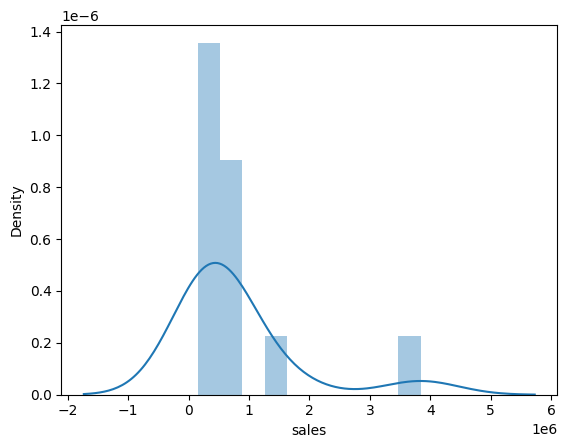

In [29]:
sns.distplot(data.sales)

<Axes: >

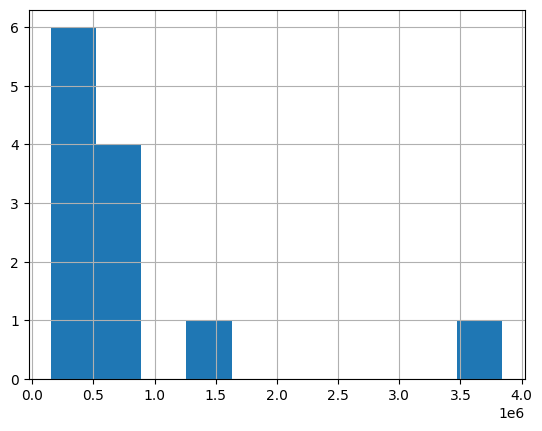

In [30]:
data.sales.hist()

<Axes: xlabel='SEASONAL PRICE', ylabel='Density'>

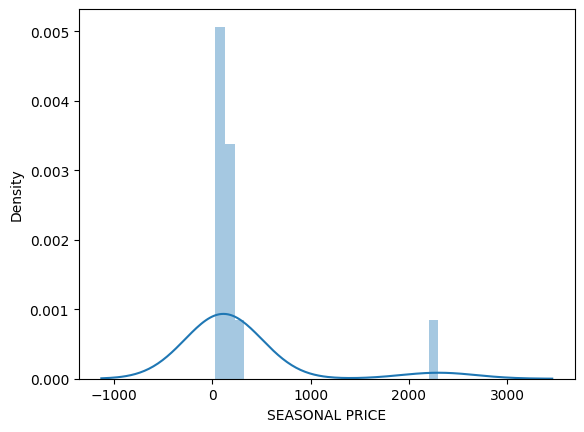

In [31]:
sns.distplot(data['SEASONAL PRICE'])

<Axes: xlabel='Off seasonal price', ylabel='Density'>

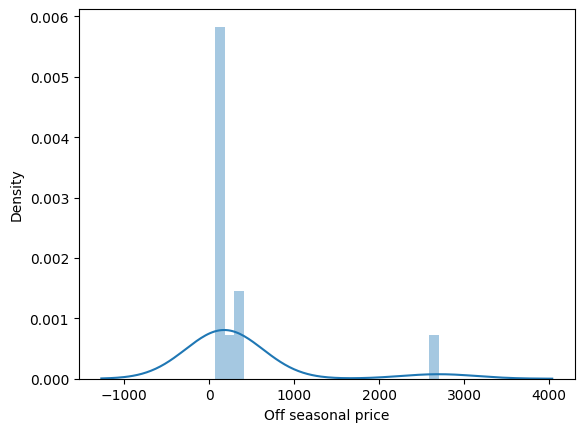

In [32]:
sns.distplot(data['Off seasonal price'])

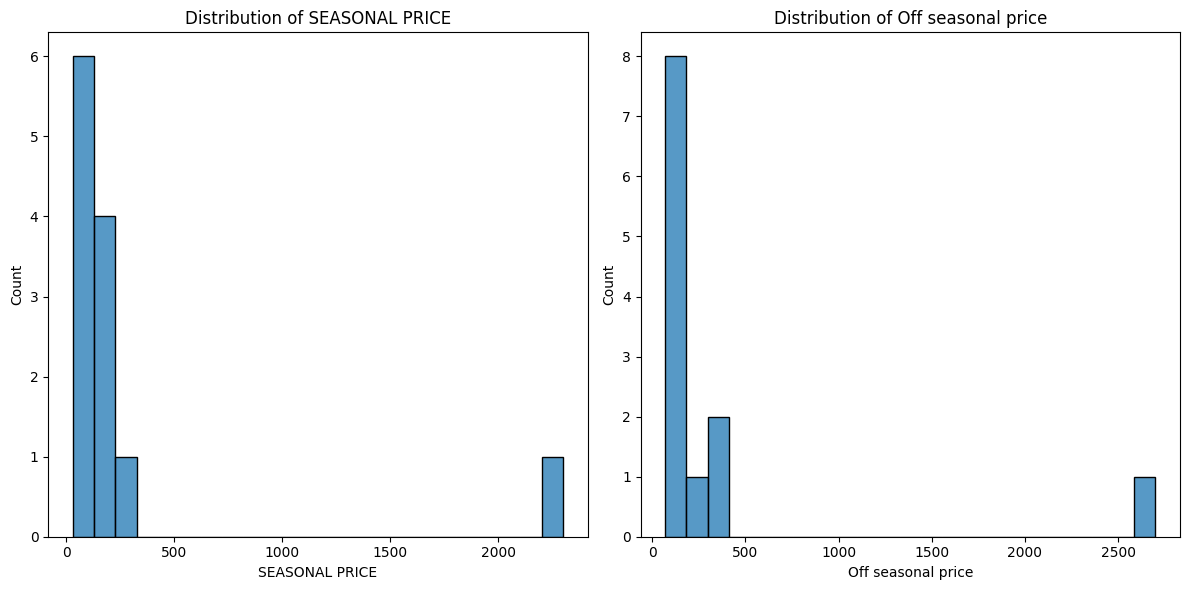

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot 'SEASONAL PRICE' on the first subplot
sns.histplot(data['SEASONAL PRICE'], ax=axes[0])
axes[0].set_title('Distribution of SEASONAL PRICE')

# Plot 'Off seasonal price' on the second subplot
sns.histplot(data['Off seasonal price'], ax=axes[1])
axes[1].set_title('Distribution of Off seasonal price')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

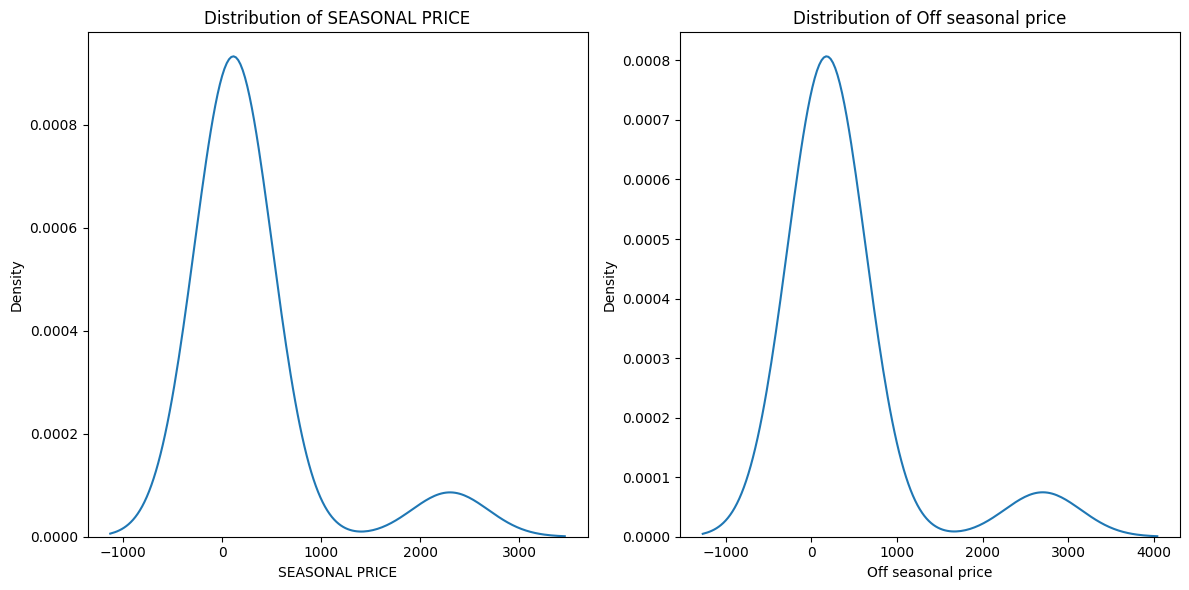

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot 'SEASONAL PRICE' on the first subplot as a KDE plot
sns.kdeplot(data['SEASONAL PRICE'], ax=axes[0])
axes[0].set_title('Distribution of SEASONAL PRICE')

# Plot 'Off seasonal price' on the second subplot as a KDE plot
sns.kdeplot(data['Off seasonal price'], ax=axes[1])
axes[1].set_title('Distribution of Off seasonal price')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

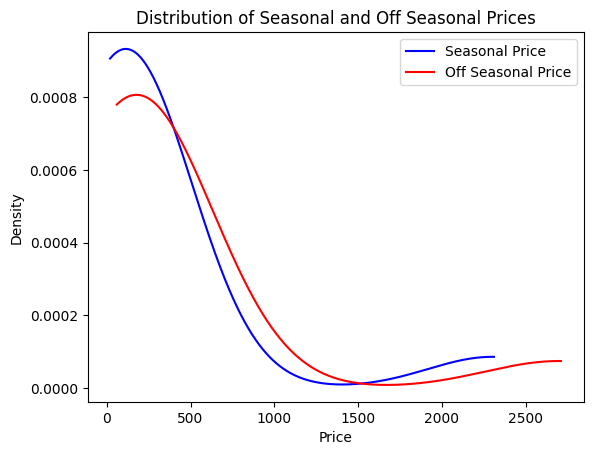

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

# Calculate minimum values
min_seasonal = data['SEASONAL PRICE'].min()
min_off_seasonal = data['Off seasonal price'].min()

# Create KDE objects without reflection
# The reflect parameter is not available in scipy.stats.gaussian_kde
kde_seasonal = gaussian_kde(data['SEASONAL PRICE'], bw_method='scott')
kde_off_seasonal = gaussian_kde(data['Off seasonal price'], bw_method='scott')

# Generate x values for plotting, extending slightly beyond the data range
x_seasonal = np.linspace(min_seasonal - 10, data['SEASONAL PRICE'].max() + 10, 1000)  # Extend range
x_off_seasonal = np.linspace(min_off_seasonal - 10, data['Off seasonal price'].max() + 10, 1000)  # Extend range


# Plot the KDE curves
plt.plot(x_seasonal, kde_seasonal(x_seasonal), color='blue', label='Seasonal Price')
plt.plot(x_off_seasonal, kde_off_seasonal(x_off_seasonal), color='red', label='Off Seasonal Price')

# Set plot labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Seasonal and Off Seasonal Prices')

# Add a legend
plt.legend()

# Display the plot
plt.show()

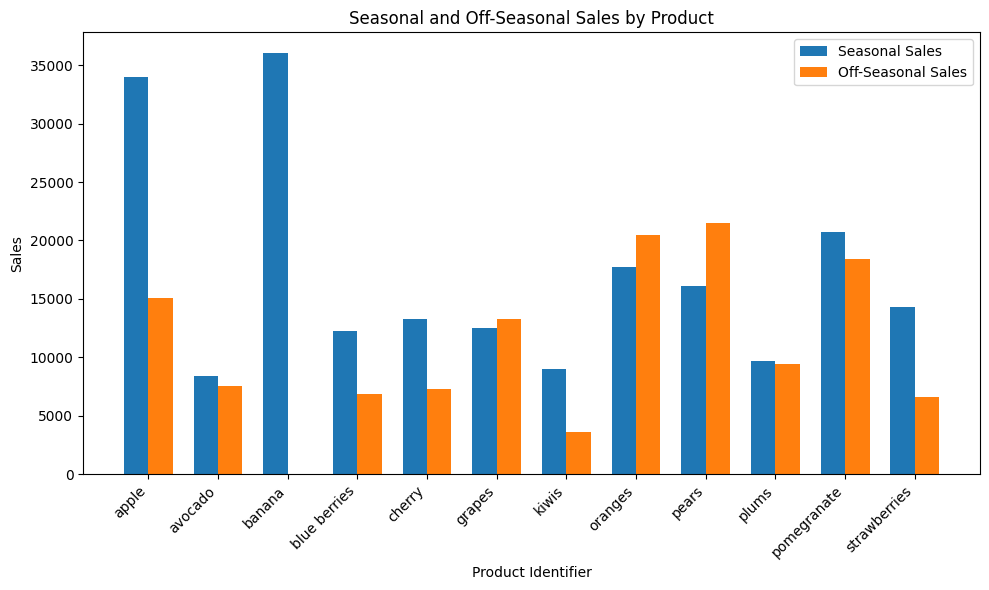

In [40]:
import matplotlib.pyplot as plt
import pandas as pd # Assuming you've already imported pandas

# Assuming 'data' is your DataFrame with columns 'product_id', 'SEASONAL sales', 'Off seasonal sales', 'Quantity of sold'

# **Change 'product_name' to the actual column name in your DataFrame**
# For example, if the column is named 'product_id', use:
fruit_sales = data.groupby('product_name')[['SEASONAL Sales', 'Off seasonal sales']].sum()
# **Or if you have a 'product_category' column use:**
#fruit_sales = data.groupby('product_category')[['SEASONAL Sales', 'Off seasonal Sales']].sum()

# Calculate total sales for each fruit
fruit_sales['Total Sales'] = fruit_sales['SEASONAL Sales'] + fruit_sales['Off seasonal sales']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed

# Bar plot for seasonal and off-seasonal sales
width = 0.35  # Width of bars
x = fruit_sales.index  # Fruit names as x-axis labels

# Convert the index to numerical values for bar plotting
x_numerical = range(len(x))

# Use numerical x values for bar positions
ax.bar(x_numerical, fruit_sales['SEASONAL Sales'], width, label='Seasonal Sales')
ax.bar([i + width for i in x_numerical], fruit_sales['Off seasonal sales'], width, label='Off-Seasonal Sales')

# Customize the plot
ax.set_xlabel('Product Identifier') # Changed to 'Product Identifier' or the relevant column name
ax.set_ylabel('Sales')
ax.set_title('Seasonal and Off-Seasonal Sales by Product') # You might want to change this to '...by Product'

# Set x-axis ticks to the original string labels
ax.set_xticks([i + width / 2 for i in x_numerical])
ax.set_xticklabels(x, rotation=45, ha='right')  # Rotate labels if needed
ax.legend()

plt.tight_layout()
plt.show()

sales visualisation

In [ ]:
import pandas as pd

# Load your dataset (adjust the file path as necessary)
data = pd.read_csv('/content/DATASET.csv')

In [ ]:
monthly_sales = data.melt(id_vars=['product_id', 'product_category_name'],  # Use actual column names from your DataFrame
                           value_vars=['jan', 'feb', 'march',
                                       'april', 'may', 'june',
                                       'july', 'aug', 'sept',
                                       'oct', 'nov', 'dec'],
                           var_name='Month', value_name='Sales')

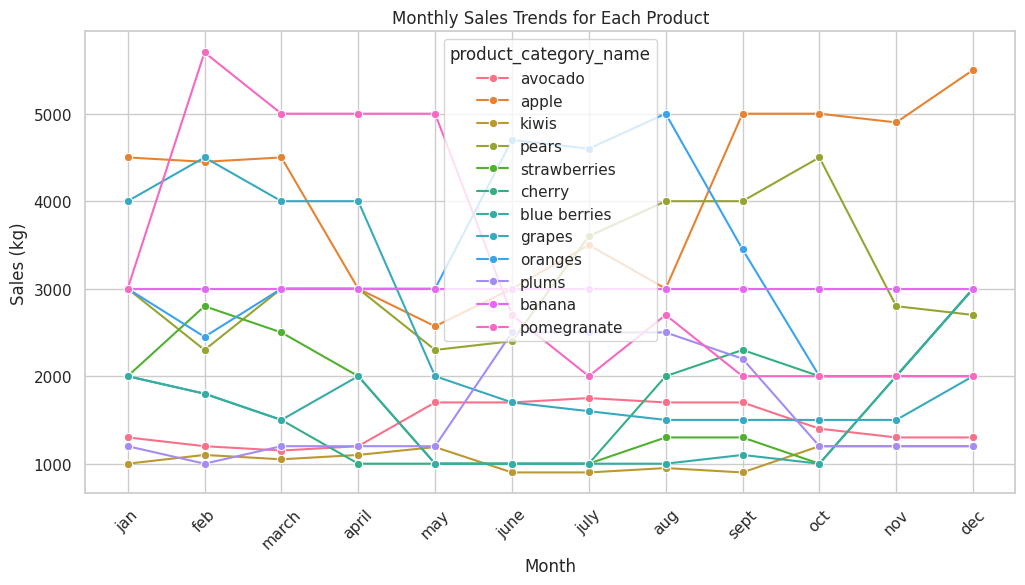

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a line plot for monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='product_category_name', marker='o') # Changed 'Product Name' to 'product_category_name'

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Sales (kg)')
plt.title('Monthly Sales Trends for Each Product')
plt.xticks(rotation=45)  # Rotate month labels for better visibility

# Show the plot
plt.show()

In [ ]:
#Independent Variables:
# Assuming 'monthly_sales' is the DataFrame you want to use
new_data = monthly_sales.copy()  # Create a copy to avoid modifying the original DataFrame
x = new_data.drop("Sales", axis=1)  # Changed "sales" to "Sales" to match column name

#Dependent Variables
y = new_data["Sales"].values.reshape(-1, 1)  # Changed "sales" to "Sales" to match column name

data encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['fruit1', 'fruit10', 'fruit2', 'fruit3', 'fruit4', 'fruit5',
       'fruit6', 'fruit7', 'fruit8', 'fruit9', 'fruite11', 'fruite12'],
      dtype=object)]
[array(['apple', 'avocado', 'banana', 'blue berries', 'cherry', 'grapes',
       'kiwis', 'oranges', 'pears', 'plums', 'pomegranate',
       'strawberries'], dtype=object)]
[array(['aug-jan', 'feb-may', 'jan-april', 'jan-dec', 'july-oct',
       'june-sept', 'may-sept', 'nov-april', 'oct-may', 'sept-march'],
      dtype=object)]
[array(['andhra pradesh'], dtype=object)]


In [ ]:
data_encoded.head(3)

,product_id,product_category_name,month_year,place,total_price,freight_price,unit_price_per100g,product_name_lenght,product_weight_g,product_score,...,sept,oct,nov,dec,SEASONAL Sales,Off seasonal sales,SEASONAL PRICE,Off seasonal price,Quantity of sold,sales
0,0.0,1.0,6.0,0.0,240,17.0,24.0,7,1000,4.5,...,1700,1400,1300,1300,8450,7550,180,250,16000,384000
1,2.0,0.0,9.0,0.0,150,13.6,15.0,5,1000,4.3,...,5000,5000,4900,5500,33950,15070,140,180,49020,735300
2,3.0,6.0,8.0,0.0,185,14.8,18.5,5,1000,4.0,...,900,1200,1200,1200,9040,3650,130,180,12690,234765


In [ ]:
X = data_encoded.drop('sales',axis=1)
y = data_encoded['sales']

In [ ]:
#Splitting The data  into Train and Test Dataset:
from sklearn.model_selection import train_test_split
# Changed 'x' to 'X' to use the correct feature data
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size =0.20, random_state = 3)

In [ ]:
features = ['total_price', 'freight_price', 'unit_price_per100g',
            'SEASONAL PRICE', 'Off seasonal price',
       'Quantity of sold', 'sales']

In [ ]:
monthly_sales_columns = ['jan', 'feb', 'march',
                                       'april', 'may', 'june',
                                       'july', 'aug', 'sept', # Changed 'sep' to 'sept'
                                       'oct', 'nov', 'dec']
features += monthly_sales_columns

# Target variable (what we want to predict)
target = 'sales'

In [ ]:
X = data[features]
y = data[target]

fit your model

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% of data for testing, 80% for training
# random_state=42 ensures consistent splitting for reproducibility

# Now you can use LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # X_train and y_train are now defined

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test) # Use 'regressor' instead of 'model'

In [ ]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.9999999999970312

In [ ]:
#Checking Root Mean Square error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

0.3451765025885601

In [ ]:
# Predict sales on the training set
# Changed from 'model' to 'regressor' which is already fitted.
y_train_pred = regressor.predict(X_train)
print(f"Predicted Sales: {y_train_pred}")

Predicted Sales: [ 305600.  618000.  234765.  735300. 1564000.  229900.  154800.  676800.
 3840000.]


In [ ]:
import pandas as pd

# Create a DataFrame to compare actual and predicted sales
comparison = pd.DataFrame({'Actual Sales': y_train, 'Predicted Sales': y_train_pred})
print(comparison)

    Actual Sales  Predicted Sales
8         305600         305600.0
5         618000         618000.0
2         234765         234765.0
1         735300         735300.0
11       1564000        1564000.0
4         229900         229900.0
7         154800         154800.0
3         676800         676800.0
6        3840000        3840000.0


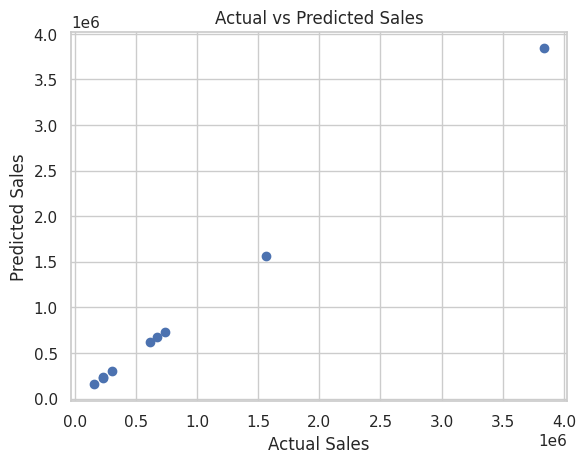

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression # Import the model class

# Assuming you have X_train and y_train from previous steps
# Create and fit the model
model = LinearRegression() # Create an instance of the model
model.fit(X_train, y_train)  # Train the model

y_pred = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'mean squared error: {mse}')
print(f'root mean squared error: {rmse}')
print(f'R-squared: {r2}')

mean squared error: 0.11914681793927023
root mean squared error: 0.3451765025885601
R-squared: 0.9999999999970312


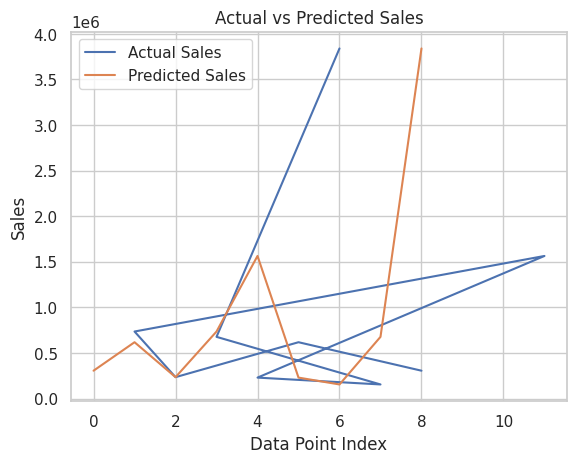

In [ ]:
plt.plot(y_train, label='Actual Sales')  # Plot actual sales
plt.plot(y_train_pred, label='Predicted Sales')  # Plot predicted sales
plt.xlabel('Data Point Index')  # X-axis represents the index of the data points
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()  # Show legend to distinguish between actual and predicted
plt.show()

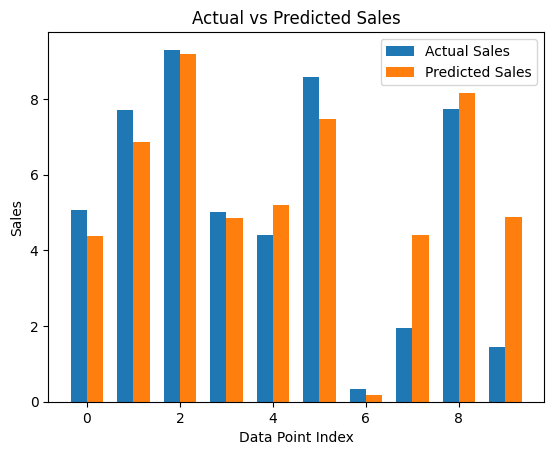

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train and y_train_pred are already defined
# If they aren't defined, you'll need to load or create them here
# For example, if you have a DataFrame 'df' with a 'Sales' column:
# y_train = df['Sales'].values
# and you'll need to create y_train_pred using your model

# Create sample data if y_train and y_train_pred are not available
# Replace this with your actual data loading/prediction logic
y_train = np.random.rand(10) * 10  # Example: 10 random sales values
y_train_pred = y_train + np.random.randn(10) * 2  # Example: Predictions with some noise


# Get the indices for the x-axis
x_indices = np.arange(len(y_train))

# Create the bar plot
width = 0.35  # Width of the bars
plt.bar(x_indices - width/2, y_train, width, label='Actual Sales')
plt.bar(x_indices + width/2, y_train_pred, width, label='Predicted Sales')

# Customize the plot
plt.xlabel('Data Point Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()

# Show the plot
plt.show()

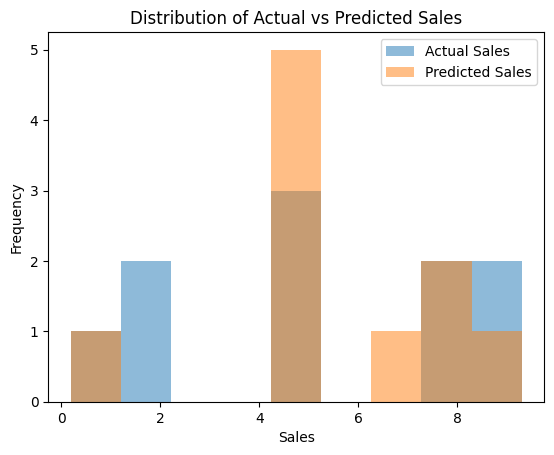

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train and y_train_pred are already defined
# Create bins for the histogram
bins = np.linspace(min(y_train.min(), y_train_pred.min()),
                   max(y_train.max(), y_train_pred.max()),
                   10)  # Adjust the number of bins as needed

# Plot the histograms
plt.hist(y_train, bins, alpha=0.5, label='Actual Sales')
plt.hist(y_train_pred, bins, alpha=0.5, label='Predicted Sales')

# Customize the plot
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Sales')
plt.legend()

# Show the plot
plt.show()

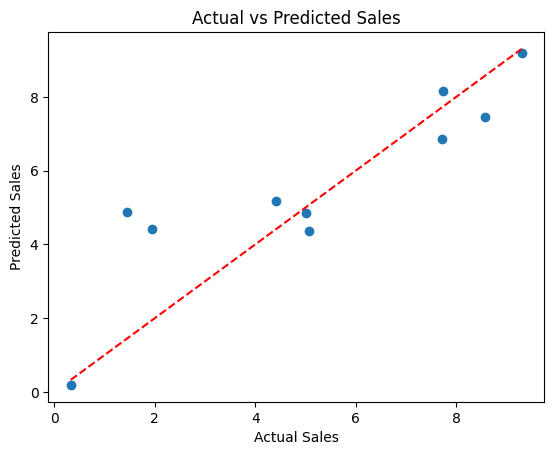

In [51]:
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are already defined
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')

plt.show()

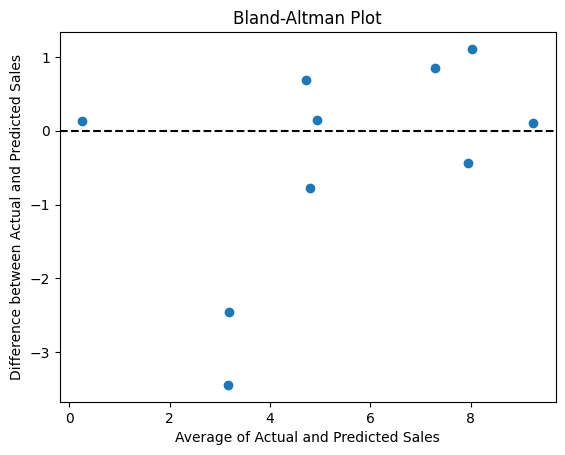

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_train and y_train_pred are already defined
differences = y_train - y_train_pred
average = (y_train + y_train_pred) / 2

plt.scatter(average, differences)
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Average of Actual and Predicted Sales')
plt.ylabel('Difference between Actual and Predicted Sales')
plt.title('Bland-Altman Plot')
plt.show()

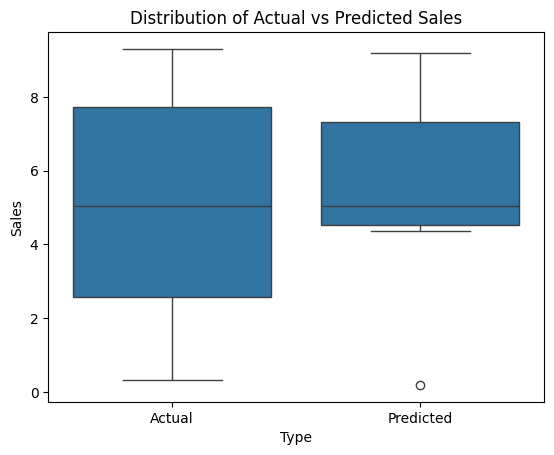

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train and y_train_pred are already defined
data = pd.DataFrame({'Sales': np.concatenate([y_train, y_train_pred]),
                     'Type': ['Actual'] * len(y_train) + ['Predicted'] * len(y_train_pred)})

sns.boxplot(x='Type', y='Sales', data=data)
plt.title('Distribution of Actual vs Predicted Sales')
plt.show()